In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
import copy as cp

# Load Data

In [2]:
df_blast2go = pd.read_csv('data/blast2go_go_table.txt', delimiter = "\t")

In [222]:
df_blast2go

,Unnamed: 0,Tags,SeqName,Description,Length,#Hits,e-Value,sim mean,#GO,GO IDs,GO Names,Enzyme Codes,Enzyme Names,InterPro IDs,InterPro GO IDs,InterPro GO Names
0,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00005|dnaA|chromosomal,chromosomal replication initiator protein DnaA,1317,20.0,0.000000e+00,94.75,5.0,F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO...,F:DNA replication origin binding; F:ATP bindin...,NaN,NaN,IPR020591 (PRINTS); IPR013159 (SMART); IPR0035...,F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO...,F:DNA binding; F:DNA replication origin bindin...
1,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00010||DNA,DNA polymerase III subunit beta,1101,20.0,0.000000e+00,89.35,8.0,F:GO:0003677; F:GO:0003887; C:GO:0005737; P:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EC:2.7.7.7,DNA-directed DNA polymerase,IPR001001 (SMART); G3DSA:3.10.150.10 (GENE3D);...,F:GO:0003677; F:GO:0003887; P:GO:0006260; F:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...
2,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00015|recF|DNA,DNA replication/repair protein RecF,1080,20.0,0.000000e+00,80.63,6.0,F:GO:0003697; F:GO:0005524; C:GO:0005737; P:GO...,F:single-stranded DNA binding; F:ATP binding; ...,NaN,NaN,IPR042174 (G3DSA:1.20.1050.GENE3D); IPR003395 ...,F:GO:0003697; F:GO:0005524; P:GO:0006281,F:single-stranded DNA binding; F:ATP binding; ...
3,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00020|gyrB|DNA,DNA topoisomerase (ATP-hydrolyzing) subunit B,2415,20.0,0.000000e+00,94.67,8.0,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EC:3.6.1.3; EC:5.6.2.2; EC:3.6.1.15,Adenosinetriphosphatase; n/a; Nucleoside-triph...,PR00418 (PRINTS); IPR000565 (PRINTS); IPR00359...,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...
4,True,"[INTERPRO, BLASTED]",EQU24_RS00025||hypothetical,membrane protein,237,20.0,1.550160e-49,83.50,NaN,NaN,NaN,NaN,NaN,no IPS match,no IPS match,no IPS match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22135|mnmE|tRNA,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,1347,20.0,0.000000e+00,89.80,6.0,F:GO:0003924; F:GO:0005515; F:GO:0005525; C:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EC:3.6.1.15,Nucleoside-triphosphate phosphatase,IPR004520 (TIGRFAM); IPR006073 (PFAM); IPR0258...,F:GO:0003924; F:GO:0005515; F:GO:0005525; P:GO...,F:GTPase activity; F:protein binding; F:GTP bi...
4369,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22140|yidC|membrane,membrane protein insertase YidC,1698,20.0,0.000000e+00,86.48,5.0,C:GO:0005886; P:GO:0015031; C:GO:0016021; F:GO...,C:plasma membrane; P:protein transport; C:inte...,NaN,NaN,IPR001708 (PRINTS); IPR001708 (PRINTS); IPR038...,C:GO:0016021; F:GO:0032977,C:integral component of membrane; F:membrane i...
4370,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22145|yidD|membrane,membrane protein insertion efficiency factor YidD,222,20.0,5.161060e-47,88.95,1.0,C:GO:0005886,C:plasma membrane,NaN,NaN,IPR002696 (SMART); IPR002696 (TIGRFAM); IPR002...,no GO terms,no GO terms
4371,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22150|rnpA|ribonuclease,ribonuclease P protein component,369,20.0,1.697640e-74,88.38,4.0,F:GO:0000049; P:GO:0001682; F:GO:0004526; P:GO...,F:tRNA binding; P:tRNA 5'-leader removal; F:ri...,EC:3.1.30; EC:3.1.26; EC:3.1.26.5,Acting on ester bonds; Acting on ester bonds; ...,IPR014721 (G3DSA:3.30.230.GENE3D); IPR000100 (...,F:GO:0000049; F:GO:0004526; P:GO:0008033,F:tRNA binding; F:ribonuclease P activity; P:t...


In [277]:
df_gofeat = pd.read_csv('data/gofeat_go_annotation.txt', delimiter = "\t")

In [278]:
df_gofeat

,#,Locus tag,Length,Product,Completeness,Gene onthology,SEED,Protein databases,Genome annotation databases,Family and domain databases,Crossreferences
0,1,EQU24_RS00005|dnaA|chromosomal replication ini...,438.0,Chromosomal replication initiator protein DnaA,99.77% [1314/1317],GO:0003688 - DNA replication origin binding|GO...,NaN,Uniprot (A0A4P9UMW3)|Interpro (A0A4P9UMW3),KEGG (mbur:EQU24_00005)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003593)|Interpro (IPR001957)|Inte...,EMBL (CP035467)
1,2,EQU24_RS00010||DNA polymerase III subunit beta,366.0,Beta sliding clamp,99.73% [1098/1101],GO:0003677 - DNA binding|GO:0003887 - DNA-dire...,NaN,Uniprot (A0A4P9UIN3)|Interpro (A0A4P9UIN3),KEGG (mbur:EQU24_00010)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001001)|Interpro (IPR022635)|Inte...,EMBL (CP035467)
2,3,EQU24_RS00015|recF|DNA replication/repair prot...,359.0,DNA replication and repair protein RecF,99.72% [1077/1080],GO:0003697 - single-stranded DNA binding|GO:00...,NaN,Uniprot (A0A4P9UIH3)|Interpro (A0A4P9UIH3),KEGG (mbur:EQU24_00015)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001238)|Interpro (IPR027417)|Inte...,EMBL (CP035467)
3,4,EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...,804.0,DNA gyrase subunit B,99.88% [2412/2415],GO:0003677 - DNA binding|GO:0003918 - DNA topo...,NaN,Uniprot (A0A4P9UI83)|Interpro (A0A4P9UI83),KEGG (mbur:EQU24_00020)|KEGG GM (mbur:EQU24_00...,Interpro (IPR002288)|Interpro (IPR011557)|Inte...,EMBL (CP035467)
4,5,EQU24_RS00025||hypothetical protein,77.0,Uncharacterized protein,97.47% [231/237],NaN,NaN,Uniprot (A0A4P9UJZ0)|Interpro (A0A4P9UJZ0),KEGG (mbur:EQU24_00025)|KEGG GM (mbur:EQU24_00...,NaN,EMBL (CP035467)
...,...,...,...,...,...,...,...,...,...,...,...
4368,4369,EQU24_RS22135|mnmE|tRNA uridine-5-carboxymethy...,447.0,tRNA modification GTPase MnmE,99.55% [1341/1347],GO:0003924 - GTPase activity|GO:0005525 - GTP ...,NaN,Uniprot (A0A4P9USW8)|Interpro (A0A4P9USW8),KEGG (mbur:EQU24_22115)|KEGG GM (mbur:EQU24_22...,Interpro (IPR031168)|Interpro (IPR018948)|Inte...,EMBL (CP035467)
4369,4370,EQU24_RS22140|yidC|membrane protein insertase ...,565.0,Membrane protein insertase YidC,99.82% [1695/1698],GO:0005886 - plasma membrane|GO:0015031 - prot...,NaN,Uniprot (A0A4V1IKE6)|Interpro (A0A4V1IKE6),KEGG (mbur:EQU24_22120)|KEGG GM (mbur:EQU24_22...,Interpro (IPR019998)|Interpro (IPR028055)|Inte...,EMBL (CP035467)
4370,4371,EQU24_RS22145|yidD|membrane protein insertion ...,73.0,Putative membrane protein insertion efficiency...,98.65% [219/222],GO:0005886 - plasma membrane,NaN,Uniprot (A0A4P9UXR4)|Interpro (A0A4P9UXR4),KEGG (mbur:EQU24_22125)|KEGG GM (mbur:EQU24_22...,Interpro (IPR002696)|Pfam (PF01809),EMBL (CP035467)
4371,4372,EQU24_RS22150|rnpA|ribonuclease P protein comp...,121.0,Ribonuclease P protein component,98.37% [363/369],GO:0000049 - tRNA binding|GO:0001682 - tRNA 5'...,NaN,Uniprot (A0A351UY10)|Interpro (A0A351UY10),NaN,Interpro (IPR020568)|Interpro (IPR014721)|Inte...,EMBL (DNKF01000037)


# Workflow

- separate out the loci as separate columns
- separate out the GO Term #
- Use new data frame to query based on the clusters generated previously --> bunch the ones of interest together 
    - this means that we need to have a compiled list of the EQU loci #s for the smaller groups of interest --> we have code for this already!
- Once groups of the GO Terms are found: 
    - Preliminary Stages: 
        - view the GO terms (with basic GO #)
        - view the whole row (with meta data)
    - Further Down: 
        - generate some way to visualize the GO terms listed (handling conditions even where there are unrelated GO terms ----> meaning there may be more than 1 DAG )

# Query-able Dataframe construction

## df_blast2go

In [279]:
df_expanded_tags_blast2go = df_blast2go['SeqName'].str.split('|', expand = True)

new_df_columns = list(df_blast2go.columns)  + ["locus_id", "gene_name", "product"]

df_blast2go_cleaned = df_blast2go.join(df_expanded_tags_blast2go)

df_blast2go_cleaned.columns = new_df_columns


df_blast2go_cleaned = df_blast2go_cleaned[df_blast2go_cleaned['GO IDs'].notna()]
df_blast2go_cleaned = df_blast2go_cleaned[df_blast2go_cleaned['InterPro GO IDs'].notna()]


df_blast2go_cleaned

,Unnamed: 0,Tags,SeqName,Description,Length,#Hits,e-Value,sim mean,#GO,GO IDs,GO Names,Enzyme Codes,Enzyme Names,InterPro IDs,InterPro GO IDs,InterPro GO Names,locus_id,gene_name,product
0,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00005|dnaA|chromosomal,chromosomal replication initiator protein DnaA,1317,20.0,0.000000e+00,94.75,5.0,F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO...,F:DNA replication origin binding; F:ATP bindin...,NaN,NaN,IPR020591 (PRINTS); IPR013159 (SMART); IPR0035...,F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO...,F:DNA binding; F:DNA replication origin bindin...,EQU24_RS00005,dnaA,chromosomal
1,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00010||DNA,DNA polymerase III subunit beta,1101,20.0,0.000000e+00,89.35,8.0,F:GO:0003677; F:GO:0003887; C:GO:0005737; P:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EC:2.7.7.7,DNA-directed DNA polymerase,IPR001001 (SMART); G3DSA:3.10.150.10 (GENE3D);...,F:GO:0003677; F:GO:0003887; P:GO:0006260; F:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EQU24_RS00010,,DNA
2,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00015|recF|DNA,DNA replication/repair protein RecF,1080,20.0,0.000000e+00,80.63,6.0,F:GO:0003697; F:GO:0005524; C:GO:0005737; P:GO...,F:single-stranded DNA binding; F:ATP binding; ...,NaN,NaN,IPR042174 (G3DSA:1.20.1050.GENE3D); IPR003395 ...,F:GO:0003697; F:GO:0005524; P:GO:0006281,F:single-stranded DNA binding; F:ATP binding; ...,EQU24_RS00015,recF,DNA
3,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00020|gyrB|DNA,DNA topoisomerase (ATP-hydrolyzing) subunit B,2415,20.0,0.000000e+00,94.67,8.0,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EC:3.6.1.3; EC:5.6.2.2; EC:3.6.1.15,Adenosinetriphosphatase; n/a; Nucleoside-triph...,PR00418 (PRINTS); IPR000565 (PRINTS); IPR00359...,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EQU24_RS00020,gyrB,DNA
7,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00040||TolC,TolC family protein,1257,20.0,0.000000e+00,84.76,2.0,F:GO:0015562; P:GO:0055085,F:efflux transmembrane transporter activity; P...,NaN,NaN,IPR003423 (PFAM); G3DSA:1.20.1600.10 (GENE3D);...,F:GO:0015562; P:GO:0055085,F:efflux transmembrane transporter activity; P...,EQU24_RS00040,,TolC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22135|mnmE|tRNA,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,1347,20.0,0.000000e+00,89.80,6.0,F:GO:0003924; F:GO:0005515; F:GO:0005525; C:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EC:3.6.1.15,Nucleoside-triphosphate phosphatase,IPR004520 (TIGRFAM); IPR006073 (PFAM); IPR0258...,F:GO:0003924; F:GO:0005515; F:GO:0005525; P:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EQU24_RS22135,mnmE,tRNA
4369,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22140|yidC|membrane,membrane protein insertase YidC,1698,20.0,0.000000e+00,86.48,5.0,C:GO:0005886; P:GO:0015031; C:GO:0016021; F:GO...,C:plasma membrane; P:protein transport; C:inte...,NaN,NaN,IPR001708 (PRINTS); IPR001708 (PRINTS); IPR038...,C:GO:0016021; F:GO:0032977,C:integral component of membrane; F:membrane i...,EQU24_RS22140,yidC,membrane
4370,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22145|yidD|membrane,membrane protein insertion efficiency factor YidD,222,20.0,5.161060e-47,88.95,1.0,C:GO:0005886,C:plasma membrane,NaN,NaN,IPR002696 (SMART); IPR002696 (TIGRFAM); IPR002...,no GO terms,no GO terms,EQU24_RS22145,yidD,membrane
4371,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22150|rnpA|ribonuclease,ribonuclease P protein component,369,20.0,1.697640e-74,88.38,4.0,F:GO:0000049; P:GO:0001682; F:GO:0004526; P:GO...,F:tRNA binding; P:tRNA 5'-leader removal; F:ri...,EC:3.1.30; EC:3.1.26; EC:3.1.26.5,Acting on ester bonds; Acting on ester bonds; ...,IPR014721 (G3DSA:3.30.230.GENE3D); IPR000100 (...,

In [326]:
# Intended to compare the two gene ontology tool outputs
df_blast2go_no_meta_cleaned = cp.copy(df_blast2go_cleaned)

meta_goterms = cp.copy(df_blast2go_cleaned["GO IDs"])

isolate_goterms = meta_goterms.str.split(";").apply(lambda x: [y.strip() for y in x])

df_blast2go_no_meta_cleaned["GO IDs"] = go_term_trimmer(isolate_goterms, 2, 12)


meta_inter_goterms = cp.copy(df_blast2go_cleaned["InterPro GO IDs"])

isolate_inter_goterms = meta_inter_goterms.str.split(";").apply(lambda x: [y.strip() for y in x])

df_blast2go_no_meta_cleaned["InterPro GO IDs"] = go_term_trimmer(isolate_inter_goterms, 2, 12)

df_blast2go_no_meta_cleaned["InterPro GO IDs"]

0       [GO:0003677, GO:0003688, GO:0005524, GO:000627...
1       [GO:0003677, GO:0003887, GO:0006260, GO:000840...
2                    [GO:0003697, GO:0005524, GO:0006281]
3       [GO:0003677, GO:0003918, GO:0005524, GO:000569...
7                                [GO:0015562, GO:0055085]
                              ...                        
4368     [GO:0003924, GO:0005515, GO:0005525, GO:0006400]
4369                             [GO:0016021, GO:0032977]
4370                                          [ GO terms]
4371                 [GO:0000049, GO:0004526, GO:0008033]
4372                 [GO:0003735, GO:0005840, GO:0006412]
Name: InterPro GO IDs, Length: 3411, dtype: object

In [327]:
df_blast2go_no_meta_cleaned

,Unnamed: 0,Tags,SeqName,Description,Length,#Hits,e-Value,sim mean,#GO,GO IDs,GO Names,Enzyme Codes,Enzyme Names,InterPro IDs,InterPro GO IDs,InterPro GO Names,locus_id,gene_name,product
0,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00005|dnaA|chromosomal,chromosomal replication initiator protein DnaA,1317,20.0,0.000000e+00,94.75,5.0,"[GO:0003688, GO:0005524, GO:0005737, GO:000627...",F:DNA replication origin binding; F:ATP bindin...,NaN,NaN,IPR020591 (PRINTS); IPR013159 (SMART); IPR0035...,"[GO:0003677, GO:0003688, GO:0005524, GO:000627...",F:DNA binding; F:DNA replication origin bindin...,EQU24_RS00005,dnaA,chromosomal
1,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00010||DNA,DNA polymerase III subunit beta,1101,20.0,0.000000e+00,89.35,8.0,"[GO:0003677, GO:0003887, GO:0005737, GO:000626...",F:DNA binding; F:DNA-directed DNA polymerase a...,EC:2.7.7.7,DNA-directed DNA polymerase,IPR001001 (SMART); G3DSA:3.10.150.10 (GENE3D);...,"[GO:0003677, GO:0003887, GO:0006260, GO:000840...",F:DNA binding; F:DNA-directed DNA polymerase a...,EQU24_RS00010,,DNA
2,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00015|recF|DNA,DNA replication/repair protein RecF,1080,20.0,0.000000e+00,80.63,6.0,"[GO:0003697, GO:0005524, GO:0005737, GO:000626...",F:single-stranded DNA binding; F:ATP binding; ...,NaN,NaN,IPR042174 (G3DSA:1.20.1050.GENE3D); IPR003395 ...,"[GO:0003697, GO:0005524, GO:0006281]",F:single-stranded DNA binding; F:ATP binding; ...,EQU24_RS00015,recF,DNA
3,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00020|gyrB|DNA,DNA topoisomerase (ATP-hydrolyzing) subunit B,2415,20.0,0.000000e+00,94.67,8.0,"[GO:0003677, GO:0003918, GO:0005524, GO:000569...",F:DNA binding; F:DNA topoisomerase type II (do...,EC:3.6.1.3; EC:5.6.2.2; EC:3.6.1.15,Adenosinetriphosphatase; n/a; Nucleoside-triph...,PR00418 (PRINTS); IPR000565 (PRINTS); IPR00359...,"[GO:0003677, GO:0003918, GO:0005524, GO:000569...",F:DNA binding; F:DNA topoisomerase type II (do...,EQU24_RS00020,gyrB,DNA
7,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00040||TolC,TolC family protein,1257,20.0,0.000000e+00,84.76,2.0,"[GO:0015562, GO:0055085]",F:efflux transmembrane transporter activity; P...,NaN,NaN,IPR003423 (PFAM); G3DSA:1.20.1600.10 (GENE3D);...,"[GO:0015562, GO:0055085]",F:efflux transmembrane transporter activity; P...,EQU24_RS00040,,TolC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22135|mnmE|tRNA,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,1347,20.0,0.000000e+00,89.80,6.0,"[GO:0003924, GO:0005515, GO:0005525, GO:000573...",F:GTPase activity; F:protein binding; F:GTP bi...,EC:3.6.1.15,Nucleoside-triphosphate phosphatase,IPR004520 (TIGRFAM); IPR006073 (PFAM); IPR0258...,"[GO:0003924, GO:0005515, GO:0005525, GO:0006400]",F:GTPase activity; F:protein binding; F:GTP bi...,EQU24_RS22135,mnmE,tRNA
4369,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22140|yidC|membrane,membrane protein insertase YidC,1698,20.0,0.000000e+00,86.48,5.0,"[GO:0005886, GO:0015031, GO:0016021, GO:003297...",C:plasma membrane; P:protein transport; C:inte...,NaN,NaN,IPR001708 (PRINTS); IPR001708 (PRINTS); IPR038...,"[GO:0016021, GO:0032977]",C:integral component of membrane; F:membrane i...,EQU24_RS22140,yidC,membrane
4370,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22145|yidD|membrane,membrane protein insertion efficiency factor YidD,222,20.0,5.161060e-47,88.95,1.0,[GO:0005886],C:plasma membrane,NaN,NaN,IPR002696 (SMART); IPR002696 (TIGRFAM); IPR002...,[ GO terms],no GO terms,EQU24_RS22145,yidD,membrane
4371,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22150|rnpA|ribonuclease,ribonuclease P protein component,369,20.0,1.697640e-74,88.38,4.0,"[GO:0000049, GO:0001682, GO:0004526, GO:0090502]",F:tRNA binding; P:tRNA 5'-leader removal; F:ri...,EC:3.1.30; EC:3.1.26; EC:3.1.26.5,Acting on ester bonds; Acting on ester bonds; ...,IPR014721 (G3DSA:3.30.230.GENE3D

In [307]:
df_expanded_tags_go_feat = df_gofeat['Locus tag'].str.split('|', expand = True)

new_df_columns = list(df_gofeat.columns)  + ["locus_id", "gene_name", "product"]

df_gofeat_cleaned = df_gofeat.join(df_expanded_tags_go_feat)

df_gofeat_cleaned.columns = new_df_columns

df_gofeat_cleaned = df_gofeat_cleaned[df_gofeat_cleaned['Gene onthology'].notna()]

df_gofeat_cleaned

,#,Locus tag,Length,Product,Completeness,Gene onthology,SEED,Protein databases,Genome annotation databases,Family and domain databases,Crossreferences,locus_id,gene_name,product
0,1,EQU24_RS00005|dnaA|chromosomal replication ini...,438.0,Chromosomal replication initiator protein DnaA,99.77% [1314/1317],GO:0003688 - DNA replication origin binding|GO...,NaN,Uniprot (A0A4P9UMW3)|Interpro (A0A4P9UMW3),KEGG (mbur:EQU24_00005)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003593)|Interpro (IPR001957)|Inte...,EMBL (CP035467),EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA
1,2,EQU24_RS00010||DNA polymerase III subunit beta,366.0,Beta sliding clamp,99.73% [1098/1101],GO:0003677 - DNA binding|GO:0003887 - DNA-dire...,NaN,Uniprot (A0A4P9UIN3)|Interpro (A0A4P9UIN3),KEGG (mbur:EQU24_00010)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001001)|Interpro (IPR022635)|Inte...,EMBL (CP035467),EQU24_RS00010,,DNA polymerase III subunit beta
2,3,EQU24_RS00015|recF|DNA replication/repair prot...,359.0,DNA replication and repair protein RecF,99.72% [1077/1080],GO:0003697 - single-stranded DNA binding|GO:00...,NaN,Uniprot (A0A4P9UIH3)|Interpro (A0A4P9UIH3),KEGG (mbur:EQU24_00015)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001238)|Interpro (IPR027417)|Inte...,EMBL (CP035467),EQU24_RS00015,recF,DNA replication/repair protein RecF
3,4,EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...,804.0,DNA gyrase subunit B,99.88% [2412/2415],GO:0003677 - DNA binding|GO:0003918 - DNA topo...,NaN,Uniprot (A0A4P9UI83)|Interpro (A0A4P9UI83),KEGG (mbur:EQU24_00020)|KEGG GM (mbur:EQU24_00...,Interpro (IPR002288)|Interpro (IPR011557)|Inte...,EMBL (CP035467),EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B
7,8,EQU24_RS00040||TolC family protein,418.0,TolC family protein,99.76% [1254/1257],GO:0015562 - efflux transmembrane transporter ...,NaN,Uniprot (A0A4P9UI68)|Interpro (A0A4P9UI68),KEGG (mbur:EQU24_00040)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003423)|Pfam (PF02321),EMBL (CP035467),EQU24_RS00040,,TolC family protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,4369,EQU24_RS22135|mnmE|tRNA uridine-5-carboxymethy...,447.0,tRNA modification GTPase MnmE,99.55% [1341/1347],GO:0003924 - GTPase activity|GO:0005525 - GTP ...,NaN,Uniprot (A0A4P9USW8)|Interpro (A0A4P9USW8),KEGG (mbur:EQU24_22115)|KEGG GM (mbur:EQU24_22...,Interpro (IPR031168)|Interpro (IPR018948)|Inte...,EMBL (CP035467),EQU24_RS22135,mnmE,tRNA uridine-5-carboxymethylaminomethyl(34) sy...
4369,4370,EQU24_RS22140|yidC|membrane protein insertase ...,565.0,Membrane protein insertase YidC,99.82% [1695/1698],GO:0005886 - plasma membrane|GO:0015031 - prot...,NaN,Uniprot (A0A4V1IKE6)|Interpro (A0A4V1IKE6),KEGG (mbur:EQU24_22120)|KEGG GM (mbur:EQU24_22...,Interpro (IPR019998)|Interpro (IPR028055)|Inte...,EMBL (CP035467),EQU24_RS22140,yidC,membrane protein insertase YidC
4370,4371,EQU24_RS22145|yidD|membrane protein insertion ...,73.0,Putative membrane protein insertion efficiency...,98.65% [219/222],GO:0005886 - plasma membrane,NaN,Uniprot (A0A4P9UXR4)|Interpro (A0A4P9UXR4),KEGG (mbur:EQU24_22125)|KEGG GM (mbur:EQU24_22...,Interpro (IPR002696)|Pfam (PF01809),EMBL (CP035467),EQU24_RS22145,yidD,membrane protein insertion efficiency factor YidD
4371,4372,EQU24_RS22150|rnpA|ribonuclease P protein comp...,121.0,Ribonuclease P protein component,98.37% [363/369],GO:0000049 - tRNA binding|GO:0001682 - tRNA 5'...,NaN,Uniprot (A0A351UY10)|Interpro (A0A351UY10),NaN,Interpro (IPR020568)|Interpro (IPR014721)|Inte...,EMBL (DNKF01000037),EQU24_RS22150,rnpA,ribonuclease P protein component


In [311]:
go_terms_all_loci = df_gofeat_cleaned['Gene onthology'].str.split('|')

df_gofeat_cleaned["GO IDs"] = go_term_trimmer(go_terms_all_loci, 0, 10)
df_gofeat_cleaned

,#,Locus tag,Length,Product,Completeness,Gene onthology,SEED,Protein databases,Genome annotation databases,Family and domain databases,Crossreferences,locus_id,gene_name,product,GO IDs
0,1,EQU24_RS00005|dnaA|chromosomal replication ini...,438.0,Chromosomal replication initiator protein DnaA,99.77% [1314/1317],GO:0003688 - DNA replication origin binding|GO...,NaN,Uniprot (A0A4P9UMW3)|Interpro (A0A4P9UMW3),KEGG (mbur:EQU24_00005)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003593)|Interpro (IPR001957)|Inte...,EMBL (CP035467),EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,"[GO:0003688, GO:0005524, GO:0005737, GO:000627..."
1,2,EQU24_RS00010||DNA polymerase III subunit beta,366.0,Beta sliding clamp,99.73% [1098/1101],GO:0003677 - DNA binding|GO:0003887 - DNA-dire...,NaN,Uniprot (A0A4P9UIN3)|Interpro (A0A4P9UIN3),KEGG (mbur:EQU24_00010)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001001)|Interpro (IPR022635)|Inte...,EMBL (CP035467),EQU24_RS00010,,DNA polymerase III subunit beta,"[GO:0003677, GO:0003887, GO:0005737, GO:000626..."
2,3,EQU24_RS00015|recF|DNA replication/repair prot...,359.0,DNA replication and repair protein RecF,99.72% [1077/1080],GO:0003697 - single-stranded DNA binding|GO:00...,NaN,Uniprot (A0A4P9UIH3)|Interpro (A0A4P9UIH3),KEGG (mbur:EQU24_00015)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001238)|Interpro (IPR027417)|Inte...,EMBL (CP035467),EQU24_RS00015,recF,DNA replication/repair protein RecF,"[GO:0003697, GO:0005524, GO:0005737, GO:000626..."
3,4,EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...,804.0,DNA gyrase subunit B,99.88% [2412/2415],GO:0003677 - DNA binding|GO:0003918 - DNA topo...,NaN,Uniprot (A0A4P9UI83)|Interpro (A0A4P9UI83),KEGG (mbur:EQU24_00020)|KEGG GM (mbur:EQU24_00...,Interpro (IPR002288)|Interpro (IPR011557)|Inte...,EMBL (CP035467),EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,"[GO:0003677, GO:0003918, GO:0005524, GO:000569..."
7,8,EQU24_RS00040||TolC family protein,418.0,TolC family protein,99.76% [1254/1257],GO:0015562 - efflux transmembrane transporter ...,NaN,Uniprot (A0A4P9UI68)|Interpro (A0A4P9UI68),KEGG (mbur:EQU24_00040)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003423)|Pfam (PF02321),EMBL (CP035467),EQU24_RS00040,,TolC family protein,[GO:0015562]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,4369,EQU24_RS22135|mnmE|tRNA uridine-5-carboxymethy...,447.0,tRNA modification GTPase MnmE,99.55% [1341/1347],GO:0003924 - GTPase activity|GO:0005525 - GTP ...,NaN,Uniprot (A0A4P9USW8)|Interpro (A0A4P9USW8),KEGG (mbur:EQU24_22115)|KEGG GM (mbur:EQU24_22...,Interpro (IPR031168)|Interpro (IPR018948)|Inte...,EMBL (CP035467),EQU24_RS22135,mnmE,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,"[GO:0003924, GO:0005525, GO:0005737, GO:000640..."
4369,4370,EQU24_RS22140|yidC|membrane protein insertase ...,565.0,Membrane protein insertase YidC,99.82% [1695/1698],GO:0005886 - plasma membrane|GO:0015031 - prot...,NaN,Uniprot (A0A4V1IKE6)|Interpro (A0A4V1IKE6),KEGG (mbur:EQU24_22120)|KEGG GM (mbur:EQU24_22...,Interpro (IPR019998)|Interpro (IPR028055)|Inte...,EMBL (CP035467),EQU24_RS22140,yidC,membrane protein insertase YidC,"[GO:0005886, GO:0015031, GO:0016021, GO:0032977]"
4370,4371,EQU24_RS22145|yidD|membrane protein insertion ...,73.0,Putative membrane protein insertion efficiency...,98.65% [219/222],GO:0005886 - plasma membrane,NaN,Uniprot (A0A4P9UXR4)|Interpro (A0A4P9UXR4),KEGG (mbur:EQU24_22125)|KEGG GM (mbur:EQU24_22...,Interpro (IPR002696)|Pfam (PF01809),EMBL (CP035467),EQU24_RS22145,yidD,membrane protein insertion efficiency factor YidD,[GO:0005886]
4371,4372,EQU24_RS22150|rnpA|ribonuclease P protein comp...,121.0,Ribonuclease P protein component,98.37% [363/369],GO:0000049 - tRNA binding|GO:0001682 - tRNA 5'...,NaN,Uniprot (A0A351UY10)|Interpro (A0A351UY10),NaN,Interpro (IPR020568)|Interpro (IPR014721)|Inte...,EMBL (DNKF01000037),EQU24_RS22150,rnpA,ribonuclease P protein component,"[GO:0000049, GO:0001682, GO:0004526]"


In [328]:
# Set the indexes for both sets of GO terms: 

go_feat_loci_to_onto = df_gofeat_cleaned.set_index("locus_id")["GO IDs"].to_dict()
blast_go_loci_to_onto = df_blast2go_no_meta_cleaned.set_index("locus_id")["GO IDs"].to_dict()


blast_go_loci_to_interpro_onto = df_blast2go_no_meta_cleaned.set_index("locus_id")["InterPro GO IDs"].to_dict()

In [286]:
def go_term_trimmer(go_terms_all_loci, range_min, range_max):
    
    cleaned_terms = []
    
    for loci in go_terms_all_loci: 
    
        cleaned_loci = []

        for go_term in loci:

            cleaned_loci.append(go_term[range_min: range_max])

        cleaned_terms.append(cleaned_loci)
    
    return cleaned_terms

# Exploration of Dataframes

## Useful Functions

In [458]:
# Given a list of go-term lists (each representing the predicted GO terms for a loci =-> finds possible error messages encoded)
def unique_error_finder(go_term_options): 
    unique_errors = []

    for go_id in go_term_options:

        error_message = go_id[0]

        if error_message[0:3] != "GO:":
            unique_errors.append(error_message)

    unique_errors = set(unique_errors)
    return unique_errors

In [551]:
# This method builds a similarity analysis dataframe that accepts two dataframes' GO Terms, 
#    and a list of the comprising loci. Together, builds the Overlap Similarity matrix and
#    Jaccard Similarity Score
#
# returns a new dataframe with said analytic metrics
def build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder): 

    go_term_holder = []
    
    for num, locus_id in enumerate(locus_list): 
        
        first_go_ids = first_go_holder[locus_id]    #list(loci.strip() for loci in first_go_holder[locus_id].split(";"))
        second_go_ids = second_go_holder[locus_id]   #list(loci.strip() for loci in second_go_holder[locus_id].split(";"))

        overlap_go_terms = set(first_go_ids).intersection(set(second_go_ids))

        jaccard_similarity = len(overlap_go_terms) / len(set(first_go_ids).union(set(second_go_ids)))

        overlap_similarity = 0

        if len(first_go_ids) > len(second_go_ids):
            overlap_similarity = -1 * len(overlap_go_terms) / len(set(second_go_ids))
        else: 
            overlap_similarity = len(overlap_go_terms) / len(set(first_go_ids))

        go_term_holder.append([locus_id, first_go_ids, second_go_ids, jaccard_similarity, overlap_similarity, overlap_go_terms])

    df_sims = pd.DataFrame(go_term_holder)

    df_sims.columns = ["locus_id", "First_GO_IDs", "Second_GO_IDs", "Jaccard_Sim", "Overlap_Sim", "Overlap_GO_IDs"]
    return df_sims

In [ ]:
# This method builds a similarity analysis dataframe that accepts two dataframes' GO Terms, 
#    and a list of the comprising loci. Together, builds the Overlap Similarity matrix and
#    Jaccard Similarity Score
#
# returns a new dataframe with said analytic metrics
def build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder): 

    go_term_holder = []
    
    for num, locus_id in enumerate(locus_list): 
        
        first_go_ids = first_go_holder[locus_id]    #list(loci.strip() for loci in first_go_holder[locus_id].split(";"))
        second_go_ids = second_go_holder[locus_id]   #list(loci.strip() for loci in second_go_holder[locus_id].split(";"))

        overlap_go_terms = set(first_go_ids).intersection(set(second_go_ids))

        jaccard_similarity = len(overlap_go_terms) / len(set(first_go_ids).union(set(second_go_ids)))

        overlap_similarity = 0

        if len(first_go_ids) > len(second_go_ids):
            overlap_similarity = -1 * len(overlap_go_terms) / len(set(second_go_ids))
        else: 
            overlap_similarity = len(overlap_go_terms) / len(set(first_go_ids))

        go_term_holder.append([locus_id, first_go_ids, second_go_ids, jaccard_similarity, overlap_similarity, overlap_go_terms])

    df_sims = pd.DataFrame(go_term_holder)

    df_sims.columns = ["locus_id", "First_GO_IDs", "Second_GO_IDs", "Jaccard_Sim", "Overlap_Sim", "Overlap_GO_IDs"]
    return df_sims

## Check between Go Feat "GO ID" and "Interpro GO ID"

In [552]:
locus_list = list(blast_go_loci_to_onto.keys()) # list(df_blast2go_cleaned["locus_id"])
first_go_holder = blast_go_loci_to_onto #list(df_blast2go_cleaned["GO IDs"])
second_go_holder = blast_go_loci_to_interpro_onto #list(df_blast2go_cleaned["InterPro GO IDs"])

df_blast2go_sims = build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder)

df_blast2go_sims

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS00005,"[GO:0003688, GO:0005524, GO:0005737, GO:000627...","[GO:0003677, GO:0003688, GO:0005524, GO:000627...",0.571429,0.800000,"{GO:0003688, GO:0006275, GO:0006270, GO:0005524}"
1,EQU24_RS00010,"[GO:0003677, GO:0003887, GO:0005737, GO:000626...","[GO:0003677, GO:0003887, GO:0006260, GO:000840...",0.625000,-1.000000,"{GO:0006260, GO:0008408, GO:0003887, GO:000936..."
2,EQU24_RS00015,"[GO:0003697, GO:0005524, GO:0005737, GO:000626...","[GO:0003697, GO:0005524, GO:0006281]",0.500000,-1.000000,"{GO:0006281, GO:0003697, GO:0005524}"
3,EQU24_RS00020,"[GO:0003677, GO:0003918, GO:0005524, GO:000569...","[GO:0003677, GO:0003918, GO:0005524, GO:000569...",0.625000,-1.000000,"{GO:0006265, GO:0005524, GO:0005694, GO:000391..."
4,EQU24_RS00040,"[GO:0015562, GO:0055085]","[GO:0015562, GO:0055085]",1.000000,1.000000,"{GO:0015562, GO:0055085}"
...,...,...,...,...,...,...
3406,EQU24_RS22135,"[GO:0003924, GO:0005515, GO:0005525, GO:000573...","[GO:0003924, GO:0005515, GO:0005525, GO:0006400]",0.666667,-1.000000,"{GO:0005515, GO:0003924, GO:0005525, GO:0006400}"
3407,EQU24_RS22140,"[GO:0005886, GO:0015031, GO:0016021, GO:003297...","[GO:0016021, GO:0032977]",0.400000,-1.000000,"{GO:0032977, GO:0016021}"
3408,EQU24_RS22145,[GO:0005886],[ GO terms],0.000000,0.000000,{}
3409,EQU24_RS22150,"[GO:0000049, GO:0001682, GO:0004526, GO:0090502]","[GO:0000049, GO:0004526, GO:0008033]",0.400000,-0.666667,"{GO:0000049, GO:0004526}"


<b> It is evident that there is a lack of intersection between 1000+ gene loci and their constituent GO Terms

### Analysis of complete mismatch of go terms 

In [553]:
df_zero_similiarity = df_blast2go_sims[(df_blast2go_sims["Jaccard_Sim"] == 0) & (df_blast2go_sims["Overlap_Sim"] == 0)]
df_zero_similiarity

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
8,EQU24_RS00065,[GO:0016021],[ GO terms],0.0,0.0,{}
14,EQU24_RS00095,[GO:0016787],[ GO terms],0.0,0.0,{}
19,EQU24_RS00135,[GO:0016021],[ GO terms],0.0,0.0,{}
21,EQU24_RS00160,[GO:0016020],[ IPS match],0.0,0.0,{}
23,EQU24_RS00175,"[GO:0003677, GO:0004803, GO:0006313, GO:0016020]",[ IPS match],0.0,0.0,{}
...,...,...,...,...,...,...
3399,EQU24_RS22075,[GO:0016021],[ GO terms],0.0,0.0,{}
3402,EQU24_RS22100,"[GO:0016491, GO:0055114]",[ GO terms],0.0,0.0,{}
3403,EQU24_RS22105,"[GO:0004519, GO:0090305]",[ GO terms],0.0,0.0,{}
3405,EQU24_RS22125,"[GO:0003677, GO:0006310, GO:0015074]",[ GO terms],0.0,0.0,{}


<b> Initial thoughts to "[no GO terms]" and "[no IPS match]" was to eliminate the constituent terms entirely. But on second glance, this holds metadata of use! 

In [554]:
temp_reg_gos = list(df_zero_similiarity["First_GO_IDs"])
unique_error_finder(temp_reg_gos)

set()

In [555]:
# Unique errors for when the similarity overlap is 
temp_ip_gos = list(df_zero_similiarity["Second_GO_IDs"])
unique_error_finder(temp_ip_gos)

{' GO terms', ' IPS match'}

In [556]:
x = 'P:GO:0090529'
x[0:4]

'P:GO'

In [557]:
pd.read_csv("../data/avg_log_ratio_scaled.csv")

,locus_tag,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,...,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_low_iron_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
0,EQU24_RS00005,-0.515808,-0.012058,-0.480048,-0.163349,-0.648447,-0.037469,-0.491013,-0.410117,-0.485123,...,0.060397,-0.186470,-0.136377,-0.203679,-0.487435,-0.243069,0.044174,-0.122244,0.185208,-0.620522
1,EQU24_RS00010,0.480568,-0.659004,-0.218643,0.075821,-0.485571,-0.114821,-0.462526,0.094641,-0.209870,...,0.504025,-0.305931,0.204399,-0.103679,-0.283817,0.062219,0.461263,0.103303,0.191813,-0.798028
2,EQU24_RS00015,-1.072637,0.327816,-0.461533,-0.212764,-0.583017,-0.648530,-0.633792,-0.917224,-0.048206,...,0.138747,-0.385615,-0.106453,0.142845,-0.057250,-0.235794,0.034638,-0.609406,0.158782,-0.753895
3,EQU24_RS00020,0.723618,-1.032390,0.072132,-0.253222,-0.352283,0.183488,-0.292974,0.144541,0.167185,...,-0.108216,-0.132304,-0.051795,-0.311922,0.060748,-0.078771,0.169326,0.274118,0.198566,-0.532597
4,EQU24_RS00025,0.424262,-0.479325,0.028098,0.116538,-0.261659,0.082847,-0.454102,-0.051229,0.045575,...,0.450111,0.011533,0.240761,-0.573878,0.722346,0.029248,0.311967,0.268652,0.181731,-0.011128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,-0.445389,-0.627550,-1.170665,-0.396450,-1.877416,-0.819438,-1.715711,-0.966683,-0.144739,...,-1.123350,0.097626,-0.295041,0.153868,0.071796,-0.825055,0.213758,-1.168263,0.206290,-0.784262
4209,EQU24_RS22140,0.309593,-1.327737,-1.065740,-0.706776,-1.812366,-0.818297,-1.749368,-0.654022,-0.239402,...,-1.305006,-0.407547,-0.418638,0.243782,-0.820586,-0.906017,-0.091223,-0.946392,0.229381,-1.159766
4210,EQU24_RS22145,-1.028264,-0.395724,-1.265702,-0.657315,-2.492508,-0.803695,-2.140667,-0.926349,-0.555916,...,-1.210127,0.079368,-0.380479,0.362696,-0.218650,-0.747930,0.020182,-0.861652,0.229635,-1.151259
4211,EQU24_RS22150,-0.670633,-0.279756,-1.404703,-0.775605,-2.384838,-1.209018,-2.238072,-1.143556,-1.210963,...,-1.730685,0.119592,-0.495403,0.627209,-0.443132,-1.002031,-0.030594,-0.961987,0.233474,-1.159678


## Check Between "Blast2GO" and "GOFeat"

In [558]:
# Compared GO Terms --> intersection of those tested

len(locus_list)

3411

In [559]:
# Total in Blast2GO with GO Terms

len(set(blast_go_loci_to_onto.keys()))

3411

In [560]:
# Total in GoFeat with GO Terms

len(set(go_feat_loci_to_onto.keys()))

2957

In [561]:
locus_list = list(set(blast_go_loci_to_onto.keys()).intersection(set(go_feat_loci_to_onto.keys())))
first_go_holder = go_feat_loci_to_onto 
second_go_holder = blast_go_loci_to_onto 

df_blast_feat_sims = build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder)

df_blast_feat_sims

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS00835,"[GO:0000162, GO:0000287, GO:0004048]","[GO:0000162, GO:0000287, GO:0004048]",1.000000,1.0,"{GO:0000162, GO:0004048, GO:0000287}"
1,EQU24_RS01920,[GO:0016021],[GO:0016021],1.000000,1.0,{GO:0016021}
2,EQU24_RS06310,[GO:0016021],[GO:0016021],1.000000,1.0,{GO:0016021}
3,EQU24_RS21690,"[GO:0003677, GO:0006284, GO:0019104, GO:004687...","[GO:0003677, GO:0006284, GO:0019104, GO:004687...",1.000000,1.0,"{GO:0046872, GO:0051539, GO:0006284, GO:001910..."
4,EQU24_RS18180,"[GO:0016788, GO:0046872]","[GO:0016788, GO:0046872]",1.000000,1.0,"{GO:0016788, GO:0046872}"
...,...,...,...,...,...,...
2940,EQU24_RS13915,"[GO:0003824, GO:0051536]","[GO:0016829, GO:0051536]",0.333333,0.5,{GO:0051536}
2941,EQU24_RS17710,[GO:0016740],[GO:0016740],1.000000,1.0,{GO:0016740}
2942,EQU24_RS03820,"[GO:0003735, GO:0005840, GO:0006412, GO:0070180]","[GO:0003735, GO:0005840, GO:0006412, GO:0070180]",1.000000,1.0,"{GO:0006412, GO:0005840, GO:0003735, GO:0070180}"
2943,EQU24_RS08190,[GO:0008080],[GO:0008080],1.000000,1.0,{GO:0008080}


In [562]:
df_blast_feat_sims[df_blast_feat_sims["Overlap_Sim"] < 0.9]

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
42,EQU24_RS09665,[GO:0016740],[GO:0004315],0.000000,0.000000,{}
97,EQU24_RS01895,"[GO:0003677, GO:0003700, GO:0006352, GO:0016987]","[GO:0003677, GO:0003700, GO:0016987, GO:2000142]",0.600000,0.750000,"{GO:0003700, GO:0016987, GO:0003677}"
100,EQU24_RS00960,"[GO:0005524, GO:0005886, GO:0016021, GO:001982...","[GO:0005524, GO:0005886, GO:0008551, GO:001602...",0.444444,0.666667,"{GO:0005886, GO:0016021, GO:0046872, GO:0005524}"
101,EQU24_RS09600,"[GO:0000155, GO:0005524, GO:0016021]","[GO:0000155, GO:0000160, GO:0016021, GO:001810...",0.333333,0.666667,"{GO:0016021, GO:0000155}"
105,EQU24_RS11430,"[GO:0003824, GO:0050662]","[GO:0016829, GO:0050378, GO:0050662]",0.250000,0.500000,{GO:0050662}
...,...,...,...,...,...,...
2874,EQU24_RS13250,"[GO:0003676, GO:0004386, GO:0005524]","[GO:0003676, GO:0003724, GO:0005524]",0.500000,0.666667,"{GO:0003676, GO:0005524}"
2905,EQU24_RS11095,"[GO:0003824, GO:0006355]","[GO:0006355, GO:0016301, GO:0016310, GO:0016787]",0.200000,0.500000,{GO:0006355}
2910,EQU24_RS13360,"[GO:0030151, GO:0042128, GO:0050310]","[GO:0030151, GO:0050310, GO:0055114]",0.500000,0.666667,"{GO:0030151, GO:0050310}"
2924,EQU24_RS18950,[GO:0016787],[GO:0047980],0.000000,0.000000,{}


## Check Between "Blast2GO InterPro" and "GOFeat"

In [563]:
locus_list = list(set(blast_go_loci_to_interpro_onto.keys()).intersection(set(go_feat_loci_to_onto.keys())))
first_go_holder = go_feat_loci_to_onto 
second_go_holder = blast_go_loci_to_interpro_onto 

df_inter_blast_feat_sims = build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder)
df_inter_blast_feat_sims

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS00835,"[GO:0000162, GO:0000287, GO:0004048]","[GO:0000162, GO:0004048, GO:0016757]",0.500,0.666667,"{GO:0000162, GO:0004048}"
1,EQU24_RS01920,[GO:0016021],[ GO terms],0.000,0.000000,{}
2,EQU24_RS06310,[GO:0016021],[ GO terms],0.000,0.000000,{}
3,EQU24_RS21690,"[GO:0003677, GO:0006284, GO:0019104, GO:004687...","[GO:0003677, GO:0003824, GO:0006281, GO:000628...",0.375,0.600000,"{GO:0019104, GO:0006284, GO:0003677}"
4,EQU24_RS18180,"[GO:0016788, GO:0046872]",[GO:0016788],0.500,-1.000000,{GO:0016788}
...,...,...,...,...,...,...
2940,EQU24_RS13915,"[GO:0003824, GO:0051536]","[GO:0003824, GO:0051536]",1.000,1.000000,"{GO:0003824, GO:0051536}"
2941,EQU24_RS17710,[GO:0016740],[ GO terms],0.000,0.000000,{}
2942,EQU24_RS03820,"[GO:0003735, GO:0005840, GO:0006412, GO:0070180]","[GO:0003735, GO:0005840, GO:0006412]",0.750,-1.000000,"{GO:0006412, GO:0003735, GO:0005840}"
2943,EQU24_RS08190,[GO:0008080],[GO:0008080],1.000,1.000000,{GO:0008080}


## Data Visualization

In [564]:
# CHANGE THIS FOR VISUALIZING ONE OF INTEREST

# df_blast2go_sims         ====> between interpro go ids and go ids from the Blast2Go
# df_blast_feat_sims       ====> between Blast2Go go ids and GoFeat
# df_inter_blast_feat_sims ====> between Blast2Go interpro go ids and GoFeat

df_sim = df_blast_feat_sims

(array([6.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 8.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.300e+01, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 4.400e+01, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 2.500e+01, 0.000e+00,
        1.000e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.600e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 0.000e+00,
        4.300e+01, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.280e+02, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.500e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 1.370e+02, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.500e+0

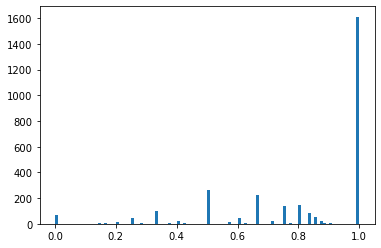

In [565]:
plt.hist(df_sim["Jaccard_Sim"], bins= 100)

In [566]:
median_jaccard_sim = df_sim["Jaccard_Sim"].median()
median_jaccard_sim

# This low value indicates that there is a degree of variation between the two sets of GO IDs in df_blast2go

1.0

In [567]:
mean_jaccard_sim = df_sim["Jaccard_Sim"].mean()
mean_jaccard_sim

# This low value indicates that there is a degree of variation between the two sets of GO IDs in df_blast2go

0.8121408482104563

(array([1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 6.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.800e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

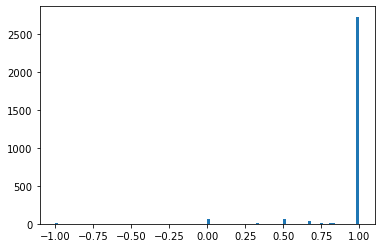

In [570]:
plt.hist(df_sim["Overlap_Sim"], bins= 100)

In [571]:
median_overlap_sim = df_sim["Overlap_Sim"].median()
median_overlap_sim

1.0

In [572]:
mean_overlap_sim = df_sim["Overlap_Sim"].mean()
mean_overlap_sim

# The positive value indicates that the InterPro GO IDs is sometimes larger than the other set of GO IDs

0.9475802409248926

In [529]:
len(df_blast2go_cleaned.index)

3411

# Export Data

In [549]:
list_form_blast_go_loci_to_onto = [blast_go_loci_to_onto.keys(), blast_go_loci_to_onto.values()]
df_blast_go_loci_to_onto = pd.DataFrame(list_form_blast_go_loci_to_onto).T
df_blast_go_loci_to_onto.columns = ["loci", "go_terms"]
df_blast_go_loci_to_onto.to_csv("../data/go_terms/blast_2_go", index = False)

In [550]:
df_blast_go_loci_to_onto

,loci,go_terms
0,EQU24_RS00005,"[GO:0003688, GO:0005524, GO:0005737, GO:000627..."
1,EQU24_RS00010,"[GO:0003677, GO:0003887, GO:0005737, GO:000626..."
2,EQU24_RS00015,"[GO:0003697, GO:0005524, GO:0005737, GO:000626..."
3,EQU24_RS00020,"[GO:0003677, GO:0003918, GO:0005524, GO:000569..."
4,EQU24_RS00040,"[GO:0015562, GO:0055085]"
...,...,...
3406,EQU24_RS22135,"[GO:0003924, GO:0005515, GO:0005525, GO:000573..."
3407,EQU24_RS22140,"[GO:0005886, GO:0015031, GO:0016021, GO:003297..."
3408,EQU24_RS22145,[GO:0005886]
3409,EQU24_RS22150,"[GO:0000049, GO:0001682, GO:0004526, GO:0090502]"


# Sanity Checks

In [530]:
y = list(df_blast2go_cleaned.iloc[0]["InterPro GO IDs"].split(";"))

In [531]:
y

['F:GO:0003677',
 ' F:GO:0003688',
 ' F:GO:0005524',
 ' P:GO:0006270',
 ' P:GO:0006275',
 ' F:GO:0043565']

In [532]:
x = list(df_blast2go_cleaned.iloc[5]["GO IDs"].split(";"))

In [533]:
x

['C:GO:0016020', ' F:GO:0022857', ' P:GO:0055085']

In [534]:
z = set(x).intersection(set(y))

In [535]:
z

set()

In [536]:
len(z) / len(set(x).union(set(y)))

0.0

In [537]:
len(z) / len(min(x, y))

0.0

In [538]:
min(x, y)

['C:GO:0016020', ' F:GO:0022857', ' P:GO:0055085']

In [539]:
go_term_holder = []

for locus in range(len(df_blast2go_cleaned.index)):

    
    locus_id = df_blast2go_cleaned.iloc[locus]["locus_id"]
    
    go_ids = list(df_blast2go_cleaned.iloc[locus]["GO IDs"].split(";"))
    interpro_go_ids = list(df_blast2go_cleaned.iloc[locus]["InterPro GO IDs"].split(";"))
    
    overlap_go_terms = set(go_ids).intersection(set(interpro_go_ids))
    
    jaccard_similarity = len(overlap_go_terms) / len(set(go_ids).union(set(interpro_go_ids)))
    
    overlap_similarity = 0
    
    if len(go_ids) > len(interpro_go_ids):
        overlap_similarity = -1 * len(overlap_go_terms) / len(set(interpro_go_ids))
    else: 
        overlap_similarity = len(overlap_go_terms) / len(set(go_ids))
        
    go_term_holder.append([locus_id, go_ids, interpro_go_ids, jaccard_similarity, overlap_similarity, overlap_go_terms])
    
df_blast2go_sims = pd.DataFrame(go_term_holder)

df_blast2go_sims.columns = ["locus_id", "GO_IDs", "Interpro_GO_IDs", "Jaccard_Sim", "Overlap_Sim", "Overlap_GO_IDs"]
df_blast2go_sims

,locus_id,GO_IDs,Interpro_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS00005,"[F:GO:0003688, F:GO:0005524, C:GO:0005737, ...","[F:GO:0003677, F:GO:0003688, F:GO:0005524, ...",0.375000,0.600000,"{ P:GO:0006270, P:GO:0006275, F:GO:0005524}"
1,EQU24_RS00010,"[F:GO:0003677, F:GO:0003887, C:GO:0005737, ...","[F:GO:0003677, F:GO:0003887, P:GO:0006260, ...",0.625000,-1.000000,"{ F:GO:0008408, P:GO:0006260, C:GO:0009360, ..."
2,EQU24_RS00015,"[F:GO:0003697, F:GO:0005524, C:GO:0005737, ...","[F:GO:0003697, F:GO:0005524, P:GO:0006281]",0.500000,-1.000000,"{F:GO:0003697, F:GO:0005524, P:GO:0006281}"
3,EQU24_RS00020,"[F:GO:0003677, F:GO:0003918, F:GO:0005524, ...","[F:GO:0003677, F:GO:0003918, F:GO:0005524, ...",0.625000,-1.000000,"{ P:GO:0006265, C:GO:0005694, F:GO:0003918, ..."
4,EQU24_RS00040,"[F:GO:0015562, P:GO:0055085]","[F:GO:0015562, P:GO:0055085]",1.000000,1.000000,"{ P:GO:0055085, F:GO:0015562}"
...,...,...,...,...,...,...
3406,EQU24_RS22135,"[F:GO:0003924, F:GO:0005515, F:GO:0005525, ...","[F:GO:0003924, F:GO:0005515, F:GO:0005525, ...",0.666667,-1.000000,"{F:GO:0003924, F:GO:0005515, F:GO:0005525, ..."
3407,EQU24_RS22140,"[C:GO:0005886, P:GO:0015031, C:GO:0016021, ...","[C:GO:0016021, F:GO:0032977]",0.166667,-0.500000,{ F:GO:0032977}
3408,EQU24_RS22145,[C:GO:0005886],[no GO terms],0.000000,0.000000,{}
3409,EQU24_RS22150,"[F:GO:0000049, P:GO:0001682, F:GO:0004526, ...","[F:GO:0000049, F:GO:0004526, P:GO:0008033]",0.400000,-0.666667,"{ F:GO:0004526, F:GO:0000049}"


In [540]:
df_blast2go["GO IDs"][0]

'F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO:0006270; P:GO:0006275'

In [541]:
df_blast2go["InterPro GO IDs"][0]

'F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO:0006270; P:GO:0006275; F:GO:0043565'

In [542]:
df_gofeat["Gene onthology"][0]

'GO:0003688 - DNA replication origin binding|GO:0005524 - ATP binding|GO:0005737 - cytoplasm|GO:0006270 - DNA replication initiation|GO:0006275 - regulation of DNA replication'